### 这个文档应在Day 3之前看，相比Day 3更详细易懂
### 机器学习的本质就是借助数学模型理解数据。当我们给模型装上可以适应观测数据的可调 参数时，“学习”就开始了;此时的程序被认为具有从数据中“学习”的能力。一旦模型 可以拟合旧的观测数据，那么它们就可以预测并解释新的观测数据。
- 有监督学习
  是指对数据的若干特征与若干标签(类型)之间的关联性进行建模的过程;只要模型被确定，就可应用到新的未知数据上。
  这类学习过程可以进一步分为分类 (classification)任务与回归(regression)任务。在分类任务中，标签都是离散值;而在回归任务中，标签都是连续值。
- 无监督学习
  是指对不带任何标签的数据特征进行建模，通常被看成是一种“让数据自己介 绍自己”的过程。这类模型包括聚类(clustering)任务和降维(dimensionality reduction) 任务。聚类算法可以将数据分成不同的组别，而降维算法追求用更简洁的方式表现数据。
- 半监督学习(semi-supervised learning)：通常可以在数据标签不完整时使用

小结

有监督学习:可以训练带标签的数据以预测新数据的标签的模型。

- 分类:可以预测两个或多个离散分类标签的模型。

- 回归:可以预测连续标签的模型。

无监督学习:识别无标签数据结构的模型。

- 聚类: 检测、识别数据显著组别的模型。

- 降维:从高维数据中检测、识别低维数据结构的模型


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 有监督学习示例:简单线性回归
(1) 选择模型类

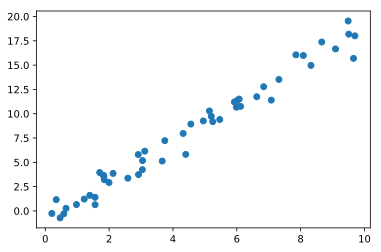

In [2]:
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

(2) 选择模型超参数
<br>有一些重要的参数必须在选择模型类时确定好。这些参数通常被称为**超参数**
<br>在 Scikit-Learn 中，我们通常在模型初始化阶段选择超参数
<br>需要注意的是，对模型进行实例化其实仅仅是存储了超参数的值。我们还没有将模型应 用到数据上:
<br>Scikit-Learn 的 API 对**选择模型**和**将模型应用到数据**区别得很清晰。

In [3]:
model = LinearRegression(fit_intercept=True) # fit_intercept：超参数 

(3) 将数据整理成特征矩阵和目标数组
<br>虽然我们的目标数组已经有了 y(长度为 n_samples 的数组)，但还需要将数据 x 整理成 `[n_samples, n_features]` 的形式。

In [4]:
X = x[:, np.newaxis]

(4) 用模型拟合数据
<br>现在就可以将模型应用到数据上了，这一步通过模型的 fit() 方法即可完成:

In [5]:
model.fit(X, y)

/Users/har/py/virtualenv/data_analysis/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

fit() 命令会在模型内部进行大量运算，运算结果将存储在模型属性中，供用户使用。
在 Scikit-Learn 中，所有通过 fit() 方法获得的模型参数都带一条下划线。例如，在线 性回归模型中，模型参数如下所示:

In [6]:
model.coef_ # 斜率 前面定义的谢亏为2，截距为1

array([1.9776566])

In [7]:
model.intercept_ # 截距

-0.9033107255311164

(5) 预测新数据的标签

In [8]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

最后，把原始数据和拟合结果都可视化出来

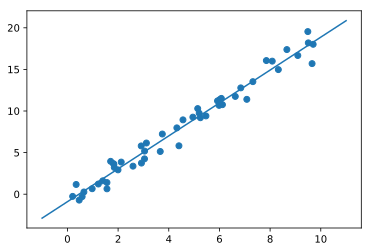

In [9]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### 有监督学习示例:鸢尾花数据分类

In [10]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
X_iris = iris.drop('species', axis=1) #feature matrix
y_iris = iris['species'] #target vector

**数据集都用标准数据类型(NumPy数组、Pandas DataFrame、SciPy稀疏矩阵)表示，参数名称用标准的Python字符串。**
<br>对于那些零元素数目远远多于非零元素数目，并且非零元素的分布没有规律的矩阵称为稀疏矩阵（sparse）
<br><br>为什么需要分成训练集(training set)和测试集(testing set)？
<br>由于需要用模型之前没有接触过的数据评估它的训练效果，因此得先将数据分割成**训练集(training set)和测试集(testing set)**。

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(112, 4) (38, 4) (112,) (38,)


用 accuracy_score 工具验证模型预测结果的准确率:

In [13]:
'整理好数据之后，用下面的模型来预测标签:'
from sklearn.naive_bayes import GaussianNB # 1.选择模型类
model = GaussianNB() # 2.初始化模型
model.fit(Xtrain, ytrain) # 3.用模型拟合数据
y_model = model.predict(Xtest) # 4.对新数据进行预测

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### 无监督学习示例:鸢尾花数据降维
鸢尾花数据集由四个维度构成,降维的任务是要找到一个可以保留数据本质特征的低维矩阵来表示高维数据。
<br>降维通常用 于辅助数据可视化的工作，毕竟用二维数据画图比用四维甚至更高维的数据画图更方便
<br>
<br>下面将使用主成分分析(principal component analysis，PCA)方法，这 是一种快速线性降维技术。我们将用模型返回两个主成分，也就是用二维数据表示鸢尾花 的四维数据。

In [15]:
from sklearn.decomposition import PCA # 1.选择模型类
model = PCA(n_components=2)             # 2.设置超参数--n_components:Number of components to keep.初始化模型
model.fit(X_iris)                                   # 3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris)             # 4. 将数据转换为二维
X_2D.shape

(150, 2)

**画出结果**
<br>由图也可看出：虽然 PCA 算法根本不知道花的种类标签，但不同种类的花 还是被很清晰地区分开来!
<br>这表明用一种比较简单的分类方法就能够有效地学习这份数据集.

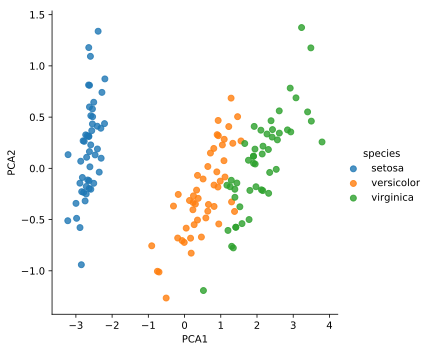

In [16]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### 无监督学习示例:鸢尾花数据聚类
聚类算法是要对没有任何标签的数据集进行分组。 我们将用一个强大的聚类方法——**高斯混合模型(Gaussian mixture model，GaussianMixture)**

In [17]:
from sklearn.mixture import GaussianMixture # 1.选择模型类
#The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
model = GaussianMixture(n_components=3, covariance_type='full') # 2.设置超参数，初始化模型
model.fit(X_iris) # 3.拟合数据，注意不需要y变量
y_gm = model.predict(X_iris) # 4. 确定簇标签

将簇标签添加到鸢尾花的 DataFrame 中，然后用 Seaborn 画出结果
<br>由图也可知：setosa(山鸢尾 花)类的花在簇 0 中被完美地区分出来，遗憾是图中 versicolor(变色鸢尾 花)和 virginicaI(维吉尼亚鸢尾花)还有一点混淆.

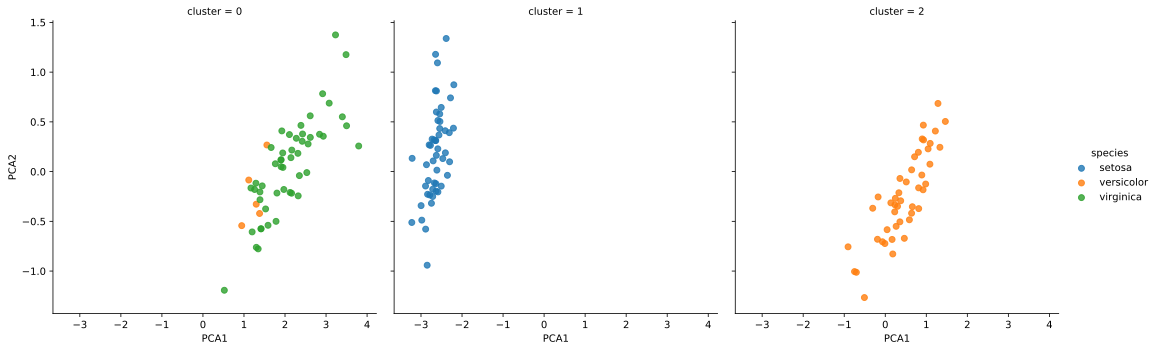

In [18]:
iris['cluster'] = y_gm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);